In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from make_df import merge_dfs
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = merge_dfs()
df = df.astype(float)
df.head()


symptom:Angular cheilitis  symptom:Aphonia  \
date       open_covid_region_code                                               
2020-03-09 US-AK                                         NaN             7.91   
           US-DC                                        2.69             5.99   
           US-DE                                        4.56            10.22   
           US-HI                                       32.41            64.27   
           US-ID                                         NaN            42.41   

                                   symptom:Burning Chest Pain  \
date       open_covid_region_code                               
2020-03-09 US-AK                                          NaN   
           US-DC                                         2.87   
           US-DE                                         6.59   
           US-HI                                          NaN   
           US-ID                                          NaN   

                                   symptom:Crackles  symptom:Dysautonomia  \
date       open_covid_region_code                                           
2020-03-09 US-AK                                NaN                  9.76   
           US-DC                               3.77                  4.72   
           US-DE                               6.17                  9.80   
           US-HI                              31.58                   NaN   
           US-ID                                NaN                   NaN   

                                   symptom:Hemolysis  symptom:Laryngitis  \
date       open_covid_region_code                                          
2020-03-09 US-AK                                 NaN               12.45   
           US-DC                                5.26                8.67   
           US-DE                                6.67               18.33   
           US-HI                                 NaN               79.22   
           US-ID                                 NaN                 NaN   

                                   symptom:Myoclonus  symptom:Rectal pain  \
date       open_covid_region_code                                           
2020-03-09 US-AK                                7.07                 7.07   
           US-DC                                3.08                 3.16   
           US-DE                                6.59                 5.57   
           US-HI                                 NaN                  NaN   
           US-ID                                 NaN                  NaN   

                                   symptom:Rumination  \
date       open_covid_region_code                       
2020-03-09 US-AK                                 8.58   
           US-DC                                 5.95   
           US-DE                                 4.98   
           US-HI                                  NaN   
           US-ID                                  NaN   

                                   symptom:Shallow breathing  symptom:Stridor  \
date       open_covid_region_code                                               
2020-03-09 US-AK                                        8.08            13.97   
           US-DC                                       11.50             4.83   
           US-DE                                       11.82            11.74   
           US-HI                                       49.58              NaN   
           US-ID                                         NaN              NaN   

                                   symptom:Urinary urgency  \
date       open_covid_region_code                            
2020-03-09 US-AK                                       NaN   
           US-DC                                      2.72   
           US-DE                                      4.81   
           US-HI                                       NaN   
           US-ID                                       NaN

In [3]:
# replace nan with 0
df.fillna(0, inplace=True)
df.head()

symptom:Angular cheilitis  symptom:Aphonia  \
date       open_covid_region_code                                               
2020-03-09 US-AK                                        0.00             7.91   
           US-DC                                        2.69             5.99   
           US-DE                                        4.56            10.22   
           US-HI                                       32.41            64.27   
           US-ID                                        0.00            42.41   

                                   symptom:Burning Chest Pain  \
date       open_covid_region_code                               
2020-03-09 US-AK                                         0.00   
           US-DC                                         2.87   
           US-DE                                         6.59   
           US-HI                                         0.00   
           US-ID                                         0.00   

                                   symptom:Crackles  symptom:Dysautonomia  \
date       open_covid_region_code                                           
2020-03-09 US-AK                               0.00                  9.76   
           US-DC                               3.77                  4.72   
           US-DE                               6.17                  9.80   
           US-HI                              31.58                  0.00   
           US-ID                               0.00                  0.00   

                                   symptom:Hemolysis  symptom:Laryngitis  \
date       open_covid_region_code                                          
2020-03-09 US-AK                                0.00               12.45   
           US-DC                                5.26                8.67   
           US-DE                                6.67               18.33   
           US-HI                                0.00               79.22   
           US-ID                                0.00                0.00   

                                   symptom:Myoclonus  symptom:Rectal pain  \
date       open_covid_region_code                                           
2020-03-09 US-AK                                7.07                 7.07   
           US-DC                                3.08                 3.16   
           US-DE                                6.59                 5.57   
           US-HI                                0.00                 0.00   
           US-ID                                0.00                 0.00   

                                   symptom:Rumination  \
date       open_covid_region_code                       
2020-03-09 US-AK                                 8.58   
           US-DC                                 5.95   
           US-DE                                 4.98   
           US-HI                                 0.00   
           US-ID                                 0.00   

                                   symptom:Shallow breathing  symptom:Stridor  \
date       open_covid_region_code                                               
2020-03-09 US-AK                                        8.08            13.97   
           US-DC                                       11.50             4.83   
           US-DE                                       11.82            11.74   
           US-HI                                       49.58             0.00   
           US-ID                                        0.00             0.00   

                                   symptom:Urinary urgency  \
date       open_covid_region_code                            
2020-03-09 US-AK                                      0.00   
           US-DC                                      2.72   
           US-DE                                      4.81   
           US-HI                                      0.00   
           US-ID                                      0.00

In [5]:
df_norm = df.copy()
df_norm = df_norm.reset_index().set_index('open_covid_region_code') #

In [6]:
df_norm_nodate = df_norm.drop(columns='date').copy() # drop the date bc messing stuff up for now, only looking at regions
df_normalized = df_norm_nodate.groupby('open_covid_region_code')[['symptom:Angular cheilitis', 'symptom:Aphonia',
       'symptom:Burning Chest Pain', 'symptom:Crackles',
       'symptom:Dysautonomia', 'symptom:Hemolysis', 'symptom:Laryngitis',
       'symptom:Myoclonus', 'symptom:Rectal pain', 'symptom:Rumination',
       'symptom:Shallow breathing', 'symptom:Stridor',
       'symptom:Urinary urgency', 'symptom:Ventricular fibrillation',
       'symptom:Viral pneumonia', 'hospitalized_cumulative',
       'hospitalized_new']].transform(lambda x: (x - x.mean()) / x.std())


In [7]:
df_normalized

,symptom:Angular cheilitis,symptom:Aphonia,symptom:Burning Chest Pain,symptom:Crackles,symptom:Dysautonomia,symptom:Hemolysis,symptom:Laryngitis,symptom:Myoclonus,symptom:Rectal pain,symptom:Rumination,symptom:Shallow breathing,symptom:Stridor,symptom:Urinary urgency,symptom:Ventricular fibrillation,symptom:Viral pneumonia,hospitalized_cumulative,hospitalized_new
open_covid_region_code,,,,,,,,,,,,,,,,,
US-AK,-0.692427,2.289374,-0.841140,-0.869629,1.104528,-1.163836,2.556330,0.610004,0.669825,0.018936,1.214065,1.817872,-0.816279,-1.638171,2.467733,-0.352946,0.000000
US-DC,-2.343095,2.434711,-0.643871,0.992020,0.439111,0.050728,3.911154,-1.350616,-1.350351,-1.738870,2.135475,1.084563,-0.517156,1.919856,2.998939,NaN,NaN
US-DE,-1.895535,2.825101,-0.180879,-0.195256,1.475263,-0.573618,4.276316,-0.482367,-1.523120,-2.783682,1.702163,2.201474,-1.437425,-0.181071,2.401034,NaN,NaN
US-HI,-0.228761,3.367945,NaN,1.032495,NaN,NaN,2.955887,NaN,NaN,NaN,0.853723,NaN,NaN,NaN,3.108748,-0.877630,-0.741487
US-ID,NaN,3.366223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.148093,-0.972309,-1.115585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US-RI,-0.331765,0.393206,-0.865624,0.378471,1.610194,2.264014,0.093790,0.168647,1.099671,1.811797,-0.254809,0.019531,1.686228,2.411853,-0.222429,1.261480,-0.463933
US-SD,-1.205300,0.801907,-1.847513,0.835434,0.713920,1.298584,-1.270592,0.072131,1.384755,-0.283563,-0.145996,0.507169,0.718274,1.746046,0.335845,1.802643,2.979876
US-VT,0.553430,-0.588258,-1.125199,1.022383,1.063539,0.782250,0.260585,0.433778,0.693675,1.859220,0.051630,0.406417,0.486471,1.869581,-0.477669,-0.265676,0.000000


In [8]:
datecol = df_norm['date'] # keep the date in case we need it
datecol

open_covid_region_code
US-AK    2020-03-09
US-DC    2020-03-09
US-DE    2020-03-09
US-HI    2020-03-09
US-ID    2020-03-09
            ...    
US-RI    2020-09-21
US-SD    2020-09-21
US-VT    2020-09-21
US-WV    2020-09-21
US-WY    2020-09-21
Name: date, Length: 464, dtype: object

In [9]:
df_normalized.fillna(0, inplace=True) # fill nan w/0 -> these places didnt have these search terms
#df_normalized['date'] = datecol

df_normalized.head()

,symptom:Angular cheilitis,symptom:Aphonia,symptom:Burning Chest Pain,symptom:Crackles,symptom:Dysautonomia,symptom:Hemolysis,symptom:Laryngitis,symptom:Myoclonus,symptom:Rectal pain,symptom:Rumination,symptom:Shallow breathing,symptom:Stridor,symptom:Urinary urgency,symptom:Ventricular fibrillation,symptom:Viral pneumonia,hospitalized_cumulative,hospitalized_new
open_covid_region_code,,,,,,,,,,,,,,,,,
US-AK,-0.692427,2.289374,-0.841140,-0.869629,1.104528,-1.163836,2.556330,0.610004,0.669825,0.018936,1.214065,1.817872,-0.816279,-1.638171,2.467733,-0.352946,0.000000
US-DC,-2.343095,2.434711,-0.643871,0.992020,0.439111,0.050728,3.911154,-1.350616,-1.350351,-1.738870,2.135475,1.084563,-0.517156,1.919856,2.998939,0.000000,0.000000
US-DE,-1.895535,2.825101,-0.180879,-0.195256,1.475263,-0.573618,4.276316,-0.482367,-1.523120,-2.783682,1.702163,2.201474,-1.437425,-0.181071,2.401034,0.000000,0.000000
US-HI,-0.228761,3.367945,0.000000,1.032495,0.000000,0.000000,2.955887,0.000000,0.000000,0.000000,0.853723,0.000000,0.000000,0.000000,3.108748,-0.877630,-0.741487
US-ID,0.000000,3.366223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.148093,-0.972309,-1.115585


In [10]:
scaler_norm = StandardScaler()
scaled_features_norm = scaler_norm.fit_transform(df_normalized)
scaled_features_norm.shape

(464, 17)

In [11]:
scaled_df_norm = pd.DataFrame(scaled_features_norm, index=df_normalized.index, columns=df_normalized.columns)
scaled_df_norm

,symptom:Angular cheilitis,symptom:Aphonia,symptom:Burning Chest Pain,symptom:Crackles,symptom:Dysautonomia,symptom:Hemolysis,symptom:Laryngitis,symptom:Myoclonus,symptom:Rectal pain,symptom:Rumination,symptom:Shallow breathing,symptom:Stridor,symptom:Urinary urgency,symptom:Ventricular fibrillation,symptom:Viral pneumonia,hospitalized_cumulative,hospitalized_new
open_covid_region_code,,,,,,,,,,,,,,,,,
US-AK,-7.817761e-01,2.329897,-9.884568e-01,-9.818434e-01,1.297974e+00,-1.367670e+00,2.886192,7.168395e-01,7.871382e-01,2.437685e-02,1.370724e+00,2.231244e+00,-9.592421e-01,-1.925079e+00,2.593777,-3.839942e-01,3.332101e-17
US-DC,-2.645442e+00,2.477806,-7.566385e-01,1.120028e+00,5.160165e-01,5.961304e-02,4.415839,-1.587161e+00,-1.586850e+00,-2.238448e+00,2.411031e+00,1.331185e+00,-6.077308e-01,2.256098e+00,3.152115,-3.332101e-17,3.332101e-17
US-DE,-2.140129e+00,2.875107,-2.125576e-01,-2.204509e-01,1.733639e+00,-6.740809e-01,4.828121,-5.668489e-01,-1.789879e+00,-3.583436e+00,1.921806e+00,2.702073e+00,-1.689175e+00,-2.127839e-01,2.523671,-3.332101e-17,3.332101e-17
US-HI,-2.582796e-01,3.427559,1.079724e-16,1.165725e+00,3.239173e-16,-1.079724e-16,3.337307,-2.249425e-16,-2.339402e-16,-1.823450e-16,9.638847e-01,-1.315691e-16,1.799540e-16,-2.699310e-17,3.267532,-9.548333e-01,-8.067137e-01
US-ID,1.296707e-16,3.425807,1.079724e-16,-6.915770e-17,3.239173e-16,-1.079724e-16,0.000000,-2.249425e-16,-2.339402e-16,-1.823450e-16,-1.383154e-16,-1.315691e-16,1.799540e-16,-2.699310e-17,3.308887,-1.057840e+00,-1.213720e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US-RI,-3.745754e-01,0.400166,-1.017228e+00,4.273076e-01,1.892202e+00,2.660532e+00,0.105892,1.981839e-01,1.292267e+00,2.332328e+00,-2.876893e-01,2.397271e-02,1.981553e+00,2.834264e+00,-0.233790,1.372449e+00,-5.047444e-01
US-SD,-1.360829e+00,0.816101,-2.171085e+00,9.432360e-01,8.389553e-01,1.526018e+00,-1.434545,8.476399e-02,1.627281e+00,-3.650313e-01,-1.648344e-01,6.224953e-01,8.440721e-01,2.051847e+00,0.352999,1.961217e+00,3.242008e+00
US-VT,6.248426e-01,-0.598670,-1.322265e+00,1.154309e+00,1.249806e+00,9.192530e-01,0.294210,5.097496e-01,8.151649e-01,2.393376e+00,5.829237e-02,4.988329e-01,5.716715e-01,2.197018e+00,-0.502067,-2.890471e-01,3.332101e-17


In [12]:
scaled_df_norm = scaled_df_norm.sort_values(by='open_covid_region_code')
scaled_df_norm

,symptom:Angular cheilitis,symptom:Aphonia,symptom:Burning Chest Pain,symptom:Crackles,symptom:Dysautonomia,symptom:Hemolysis,symptom:Laryngitis,symptom:Myoclonus,symptom:Rectal pain,symptom:Rumination,symptom:Shallow breathing,symptom:Stridor,symptom:Urinary urgency,symptom:Ventricular fibrillation,symptom:Viral pneumonia,hospitalized_cumulative,hospitalized_new
open_covid_region_code,,,,,,,,,,,,,,,,,
US-AK,-0.781776,2.329897,-0.988457,-0.981843,1.297974,-1.367670,2.886192,0.716840,0.787138,0.024377,1.370724,2.231244,-0.959242,-1.925079,2.593777,-0.383994,3.332101e-17
US-AK,-0.781776,-0.455609,-0.988457,1.239217,0.790326,0.603768,-0.514453,-1.308427,1.180399,-3.814514,-0.838880,0.474720,1.871554,1.356340,-0.503875,-0.383994,3.332101e-17
US-AK,-0.781776,-0.455609,1.172138,-0.981843,-1.424357,0.732690,-0.514453,0.321526,-1.319191,0.257037,2.117286,1.869023,1.589756,0.267673,0.945530,-0.383994,9.779669e-01
US-AK,-0.781776,1.946053,0.589563,-0.981843,0.932579,-1.367670,-0.514453,0.645225,0.492193,1.491925,1.351582,-1.234666,1.176664,-1.925079,0.641517,-0.383994,3.332101e-17
US-AK,1.244054,-0.455609,0.835258,1.153221,-1.424357,0.993221,1.058858,-1.308427,1.770290,0.243614,1.091789,-1.234666,-0.959242,-1.925079,0.986613,0.411422,2.235353e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US-WY,-0.437442,3.230664,-0.701017,1.354696,0.517742,0.996886,3.578737,-0.524352,-0.893649,0.630935,1.777067,1.752434,-0.711917,0.975954,2.717141,-1.526235,-1.606804e+00
US-WY,-0.437442,2.046197,-0.701017,0.652530,-1.428584,-0.843014,1.692416,-0.524352,-0.893649,0.195924,1.561609,2.127913,-0.711917,-1.030355,1.507094,-1.526235,1.600298e+00
US-WY,-0.437442,-0.333314,-0.701017,-0.885213,0.493909,-0.843014,-0.579743,-0.524352,-0.893649,-1.801578,-0.761302,-0.788595,-0.711917,-1.030355,-0.448428,-0.435773,-4.748853e-01


In [13]:
#scaled_df_norm.index.value_counts()
set(scaled_df_norm.index)
# all the regions have 29, so take all the data from 3 regions (29*3=87/464 = ~19% test, rest to train)
training_states =['US-AK','US-DC','US-DE','US-HI','US-ID','US-ME','US-MT','US-ND','US-NE','US-NH','US-NM','US-RI','US-SD']
test_states = ['US-VT','US-WV','US-WY']
X_train = scaled_df_norm.loc[(training_states),:'symptom:Viral pneumonia']
y_train = scaled_df_norm.loc[(training_states),'hospitalized_cumulative':]

X_test = scaled_df_norm.loc[(test_states),:'symptom:Viral pneumonia']
y_test = scaled_df_norm.loc[(test_states),'hospitalized_cumulative':]


In [14]:
MSEs = []
for n in range(1, 24):
    knn = KNeighborsRegressor(n_neighbors = n) # initialize KNN w/this number of neighbors
    knn.fit(X_train, y_train) # fit it to the training data
    y_pred = knn.predict(X_test) # predict on the validation set
    rmse = mean_squared_error(y_test, y_pred)
    MSEs.append(rmse)
  #  score = knn.score(X_test,y_test)
  #  scores.append(score)

Text(0.5, 1.0, 'KNN')

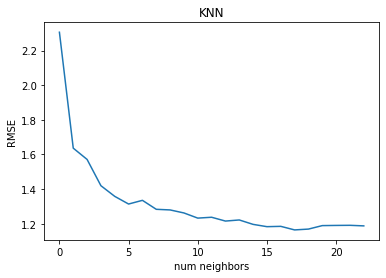

In [17]:
plt.plot(MSEs)
plt.xlabel("num neighbors")
plt.ylabel("RMSE")
plt.title("KNN")